In [4]:
import numpy as np
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')


In [15]:
from skimage import io
import numpy as np
import numpy.matlib
import random
import scipy.misc
import os
import imageio


In [8]:
def dist(a, b):
    return np.linalg.norm(a - b)

def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = np.sqrt(squared_distance)
    return dist

def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
    return c_position

def error(c, c_old):
    return dist(c, c_old)

def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [dist(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            #print('for n', clusters[j], 'for j', j)
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            # checking for empty np-array
            if points != []:
                c_positions[j] = np.mean(points, axis=0)
            else:
                continue
        
        error = dist(c_positions, old_clusters) # check for convergence
        
    return c_positions, clusters

def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.show()

In [30]:
# birb code
def init_centroids(X,K):
    cc = random.sample(list(X),K)
    c=np.stack(cc, axis=0 )
    return c

def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [2]:
def generate_fake_data(f_centers):
    x, y = make_blobs(n_samples=5000, centers=f_centers, n_features=2, random_state=195)
    xx = deepcopy(x)
    yy = deepcopy(y)
    return f_centers, x, xx, yy

def plot_reg_data(x):
    %matplotlib inline
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.show()  
    
def gen_rand_cluster(nub_cluster):
    n_features = 2
    c_pos = generate_random_clusters(n_features, nub_cluster) 
    c_pos = np.array(c_pos).T
    return c_pos

def get_centroids(x, cent_pos):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.scatter(cent_pos[:, 0], cent_pos[:, 1], marker='*', s=300, c='orange')
    pyplot.show()

In [5]:
f_centers = 4
f_cent, x, xx, yy = generate_fake_data(f_centers)
print(f_cent)

4


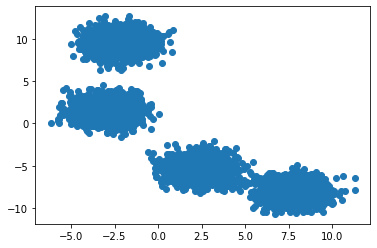

In [6]:
plot_reg_data(x)

In [9]:
cc_pos = gen_rand_cluster(f_cent)
cc_pos

array([[ 7,  1],
       [ 7,  5],
       [ 2, -4],
       [ 4,  1]])

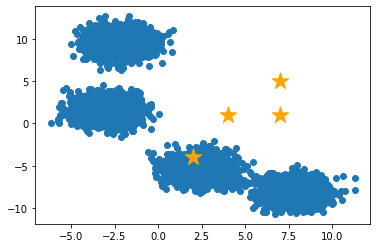

In [10]:
get_centroids(x, cc_pos)

In [11]:
nc, p = kmeans(x, cc_pos, f_cent)

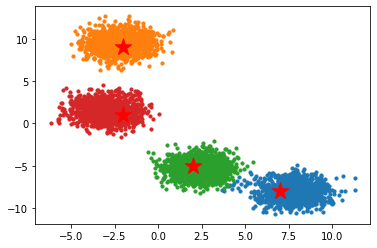

In [12]:
plot_in_col(x, f_cent, p, nc)

Do you get the same result every time?
- The result will often be similar for us but no the same. K-means is an algorithm that is in a way moving centroids iteratively so that they become better and better at splitting data and while this process is deterministic, you have to pick initial values for those centroids and this is usually done at random.

How do you determine what the final result should be?

How do you choose what K value to use?



In [ ]:
# Birb execute 

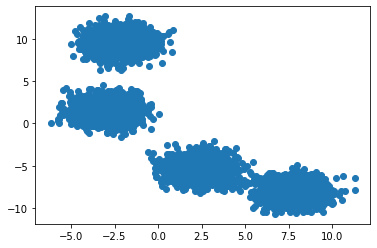

In [20]:
plot_reg_data(x)

In [31]:
K=4
cc_pos=init_centroids(x,K)
cc_pos

array([[-1.38307734,  9.52588808],
       [-3.19287868,  8.61984153],
       [ 7.88397265, -8.78865405],
       [-3.32103652,  1.07414887]])

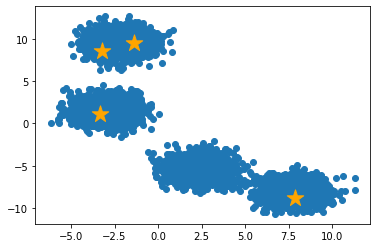

In [37]:
get_centroids(x, cc_pos)

In [35]:
n_init=5
cent, idx = run_kMean(x, cc_pos, n_init)

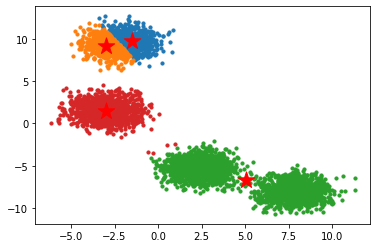

In [36]:
plot_in_col(x, f_cent, idx, cent)